In [9]:
import numpy as np

five12 = [[] for i in range(12)]
for i in range(12):
    for j in range(5*i,5*i+5):
        five12[i].append(j)
        
five_link = [[[] for i in range(12)]  for j in range(2)]
five_link[0][0] = [5,1,2,3,4]
five_link[0][1] = [0,5,6,7,2]
five_link[0][2] = [0,1,7,8,3]
five_link[0][3] = [0,2,8,9,4]
five_link[0][4] = [0,3,9,10,5]
five_link[0][5] = [0,4,10,6,1]
five_link[0][6] = [7,1,5,10,11]
five_link[0][7] = [11,8,2,1,6]
five_link[0][8] = [3,2,7,11,9]
five_link[0][9] = [4,3,8,11,10]
five_link[0][10] = [5,4,9,11,6]
five_link[0][11] = [6,7,8,9,10]

five_link[1][0] = [0,0,0,0,0]
five_link[1][1] = [1,4,1,3,1]
five_link[1][2] = [2,4,2,1,1]
five_link[1][3] = [3,4,0,1,1]
five_link[1][4] = [4,4,0,1,1]
five_link[1][5] = [0,4,0,2,1]
five_link[1][6] = [4,2,3,4,0]
five_link[1][7] = [1,2,2,3,0]
five_link[1][8] = [2,3,1,2,2]
five_link[1][9] = [2,3,4,3,2]
five_link[1][10] = [2,3,4,4,3]
five_link[1][11] = [4,0,3,3,3]

neighbors = [[] for i in range(60)]
link = []
for i in range(12):
    for j in range(5):
        link.append([five12[i][j],five12[five_link[0][i][j]][five_link[1][i][j]]])

link2 = [[] for i in range(12)]
for i in range(12):
    for j in range(5*i,5*i+4):
        link2[i].append([j,j+1])
    link2[i].append([5*i+4,5*i])           

for k in range(60):
    Link = []
    for i in range(60):
        if k in link[i]:
            Link.append(link[i])

    for i in range(12):
        for j in range(5):
            if k in link2[i][j]:
                Link.append(link2[i][j])
                Link.append(link2[i][j][::-1])
    for i in Link:
        if i[0] == k:
            neighbors[k].append(i[1])

In [10]:
import random
import matplotlib.pyplot as plt
import xlwt
import time

def init_spin_array():
    return np.ones(60)


def find_neighbors(array, i):
    return [array[neighbors[i][0]],
            array[neighbors[i][1]],
            array[neighbors[i][2]]]

def energy(array, i):
    return 2 * array[i] * np.sum(find_neighbors(array, i))

def Total_energy(array):
    E = 0
    for i in range(60):
        E +=  array[i] * np.sum(find_neighbors(array, i))
    return E/2

def IsingMC(beta,spin_array):
    # the Monte Carlo follows below
    #mag = np.zeros(sweeps)
    ene = np.zeros(sweeps)
    for sweep in range(RELAX_SWEEPS):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1
    for sweep in range(sweeps):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1
       # mag[sweep] = abs(sum(spin_array)) / 60
        ene[sweep] = Total_energy(spin_array) 
           
    #ma = sum(mag) / sweeps
    en = np.sum(ene) / sweeps
    print(beta, en)
    x.append(beta)
 #   y1.append(ma)
    y2.append(en)
    return spin_array
    


In [11]:
def allspin(s):
    e = np.zeros(60)
    for i in range(0,60,1):
        e[i] = int(s%2)
        if e[i] == 0:
            e[i] = int(-1)
        s=s//2
    return e

sum = 0
for i in range(2**12):
    sum += np.exp(-Total_energy(allspin(i)))
print(sum)

1.16076303667e-23


1.0 88.6356
0.9 87.4434
0.8 84.152
0.7 77.1182
0.6 61.9686
0.5 47.3216
0.4 36.3878
0.3 26.6256
0.2 17.9026


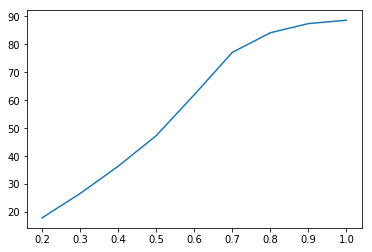

115.11127209663391


In [12]:
RELAX_SWEEPS = 10000
sweeps = 10000
betaB = 0.01
betaE = 1
interval = 0.01 
x =[]
#y1 =[]
y2 = []
timex=time.time()
spin_array = init_spin_array()
for beta in np.arange(betaE, betaB,-interval):
    spin_array = IsingMC(beta,spin_array)
#plt.figure(1)
#plt.plot(x,y1)
plt.figure(2)
plt.plot(x,y2)
plt.show()
print (time.time()-timex)

In [13]:
import math
-np.sum(y2)*interval/60+math.log(2)

-0.18611181944005462

In [80]:
Emin = -42
spin_array = np.ones(60)
for beta in np.arange(0.01, 0.001,-0.001):
    for sweep in range(sweeps):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1      
        Enew = Total_energy(spin_array)    
        if Enew <= Emin:
            Emin = Enew
            spin_array_min = spin_array
            print(Emin)
            print(spin_array_min)

In [67]:
spin_array_min

array([ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.])

In [83]:
RELAX_SWEEPS = 10000
sweeps = 10000
betaB = 1
betaE = 5
interval = 0.1 
x =[]
#y1 =[]
y2 = []
timex=time.time()
spin_array = np.array([1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, \
-1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, \
1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, \
1])
for beta in np.arange(betaB, betaE,interval):
    spin_array = IsingMC(beta,spin_array)
#plt.figure(1)
#plt.plot(x,y1)
plt.figure(2)
plt.plot(x,y2)
plt.show()
print (time.time()-timex)

1.0 88.6416
1.1 89.3694
1.2 89.6834


KeyboardInterrupt: 